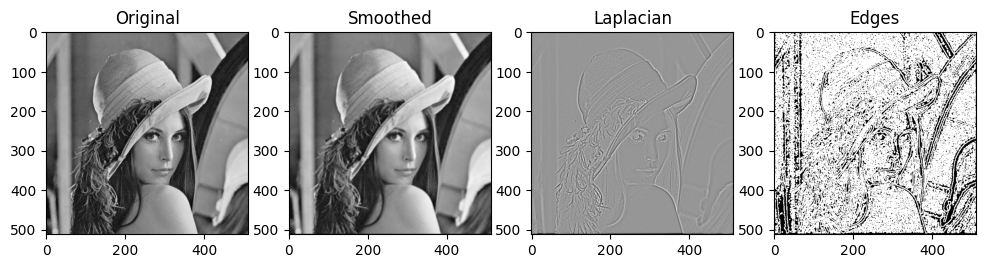

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import io
from PIL import Image

# Gaussian function
def gauss(sz, s):
    ctr = sz // 2
    k = np.zeros((sz, sz))
    for i in range(sz):
        for j in range(sz):
            x = i - ctr
            y = j - ctr
            k[i, j] = np.exp(-(x**2 + y**2) / (2 * s**2)) / (2 * np.pi * s**2)
    return k / np.sum(k)

# Convolution function
def apply_conv(img, k, norm=True):
    try:
        ir, ic = img.shape
        kr, kc = k.shape
        pad = (kr - 1) // 2
        padded_img = np.pad(img, pad, mode='constant', constant_values=0)
        res = np.zeros((ir, ic))

        for i in range(ir):
            for j in range(ic):
                res[i, j] = np.sum(padded_img[i:i + kr, j:j + kc] * k)

        if norm:
            res = (res - np.min(res)) / (np.max(res) - np.min(res)) * 255
    except Exception as e:
        print("Something went wrong in apply_conv", e)
    return res

# Zero-crossing detection
def z_cross(img):
    try:
        ir, ic = img.shape
        res = np.zeros((ir, ic))
        for i in range(1, ir - 1):
            for j in range(1, ic - 1):
                region = img[i-1:i+2, j-1:j+2]
                if np.max(region) > 0 and np.min(region) < 0:
                    res[i, j] = 255
    except:
        pass
    return res

# 5x5 Laplacian filter
def lap_5x5(img):
    k = np.array([
        [0, 0, 1, 0, 0],
        [0, 1, 2, 1, 0],
        [1, 2, -16, 2, 1],
        [0, 1, 2, 1, 0],
        [0, 0, 1, 0, 0]
    ])
    return apply_conv(img, k, norm=False)

# Main LoG function
def log_filter(img, sz=5, s=1):
    g_kernel = gauss(sz, s)  # Gaussian smooth
    smooth_img = apply_conv(img, g_kernel, norm=False)  # Apply Gaussian

    lap_img = lap_5x5(smooth_img)  # Apply 5x5 Laplacian
    edges = z_cross(lap_img)  # Detect edges

    return smooth_img, lap_img, edges

# Load image from URL
def get_img(url):
    try:
        with urllib.request.urlopen(url) as res:
            img_data = res.read()
        img = Image.open(io.BytesIO(img_data)).convert('L')  # Grayscale
    except Exception as e:
        print("Error loading image", e)
    return np.array(img)

# Display images
def show_imgs(orig_img, smooth_img, lap_img, edge_img):
    try:
        plt.figure(figsize=(12, 8))
        plt.subplot(1, 4, 1)
        plt.title('Original')
        plt.imshow(orig_img, cmap='gray')

        plt.subplot(1, 4, 2)
        plt.title('Smoothed')
        plt.imshow(smooth_img, cmap='gray')

        plt.subplot(1, 4, 3)
        plt.title('Laplacian')
        plt.imshow(lap_img, cmap='gray')

        plt.subplot(1, 4, 4)
        plt.title('Edges')
        plt.imshow(edge_img, cmap='gray')

        plt.show()
    except:
        print("Something went wrong in display")

# Main function
def run():
    img_url = "https://github.com/saptarshihalder/Assignment/blob/main/lena_color_512.jpg?raw=true"
    img = get_img(img_url)  # Load image

    sm_img, l_img, ed_img = log_filter(img, sz=5, s=1)  # Apply LoG

    show_imgs(img, sm_img, l_img, ed_img)  # Show results

if __name__ == "__main__":
    run()
